In [4]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data61834


In [5]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [6]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 11.0MB/s eta 0:00:01


In [7]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [8]:
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import pandas as pd

In [9]:
filename = "ex2data2.txt"
data = pd.read_csv(filename,header=None,names=['x1','x2','Y']) # 获取数据
print(data)


           x1        x2  Y
0    0.051267  0.699560  1
1   -0.092742  0.684940  1
2   -0.213710  0.692250  1
3   -0.375000  0.502190  1
4   -0.513250  0.465640  1
..        ...       ... ..
113 -0.720620  0.538740  0
114 -0.593890  0.494880  0
115 -0.484450  0.999270  0
116 -0.006336  0.999270  0
117  0.632650 -0.030612  0

[118 rows x 3 columns]


In [10]:
def plotData(data,axes):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data['Y'] == 0
    pos = data['Y'] == 1
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='blue', s=60, linewidth=2, label='1')
    axes.scatter(data[neg]['x1'], data[neg]['x2'], marker='o',c='red', s=60, label='0')
    axes.set_xlabel('x1')
    axes.set_ylabel('x2')
    axes.legend(frameon=True, fancybox=True)

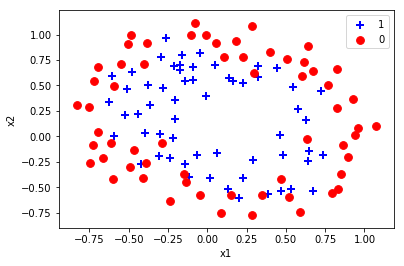

In [11]:
plotData(data,axes=None)

In [12]:
for i in range(10001):
    if i%2!=0:
        print(i,end=" ")

1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99 101 103 105 107 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249 251 253 255 257 259 261 263 265 267 269 271 273 275 277 279 281 283 285 287 289 291 293 295 297 299 301 303 305 307 309 311 313 315 317 319 321 323 325 327 329 331 333 335 337 339 341 343 345 347 349 351 353 355 357 359 361 363 365 367 369 371 373 375 377 379 381 383 385 387 389 391 393 395 397 399 401 403 405 407 409 411 413 415 417 419 421 423 425 427 429 431 433 435 437 439 441 443 445 447 449 451 453 455 457 459 461 463 465 467 469 471 473 475 477 479 481 483 485 487 489 491 493 495 497 499 501 503 505 507 509 511 513 515 517 519 521 523 525 527

In [13]:
name = "admin"
password = "123456"
i = 3
while i > 0:
    iname = input("请输入用户名：")
    ipassword = input("请输入用户密码")
    if iname == name and ipassword == password:
        print("登录成功")
        break
    else:
        print("登录失败，请重新输入！")
        i -= 1
else:
    print("您已经失败三次，无法登录了！")

请输入用户名：请输入用户密码登录成功


In [14]:
for i in range(1, 10):
    for x in range(1, i + 1):
        print('%d X %d = %d' % (i, x, i * x), end='  ')
    print('\n')

1 X 1 = 1  

2 X 1 = 2  2 X 2 = 4  

3 X 1 = 3  3 X 2 = 6  3 X 3 = 9  

4 X 1 = 4  4 X 2 = 8  4 X 3 = 12  4 X 4 = 16  

5 X 1 = 5  5 X 2 = 10  5 X 3 = 15  5 X 4 = 20  5 X 5 = 25  

6 X 1 = 6  6 X 2 = 12  6 X 3 = 18  6 X 4 = 24  6 X 5 = 30  6 X 6 = 36  

7 X 1 = 7  7 X 2 = 14  7 X 3 = 21  7 X 4 = 28  7 X 5 = 35  7 X 6 = 42  7 X 7 = 49  

8 X 1 = 8  8 X 2 = 16  8 X 3 = 24  8 X 4 = 32  8 X 5 = 40  8 X 6 = 48  8 X 7 = 56  8 X 8 = 64  

9 X 1 = 9  9 X 2 = 18  9 X 3 = 27  9 X 4 = 36  9 X 5 = 45  9 X 6 = 54  9 X 7 = 63  9 X 8 = 72  9 X 9 = 81  



In [15]:
li=[67,66,23398,38498]
str1=''
for i in li:
    str1=str1+chr(i)
print(str1)

CB学院


In [16]:
a = "Hello"
b = ",Python"
print(a + b)



Hello,Python


In [17]:
a = ["Hello"]
b = [",Python"]
print(a + b)


['Hello', ',Python']


In [18]:

a = "school of software "
print(a*3)

school of software school of software school of software 


In [19]:
pip list

Package                Version        
---------------------- ---------------
absl-py                0.8.1          
aspy.yaml              1.3.0          
astor                  0.8.1          
astroid                2.4.1          
attrs                  19.2.0         
audioread              2.1.8          
autopep8               1.5.3          
Babel                  2.8.0          
backcall               0.1.0          
bleach                 3.1.0          
cachetools             4.0.0          
certifi                2019.9.11      
cffi                   1.14.0         
cfgv                   2.0.1          
chardet                3.0.4          
Click                  7.0            
cloudpickle            1.2.1          
cma                    2.7.0          
colorlog               4.1.0          
cycler                 0.10.0         
Cython                 0.29           
decorator              4.4.0          
entrypoints            0.3            
flake8                 3.

In [20]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [21]:
pip install pandas_datareader

Looking in indexes: https://mirror.baidu.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install yfinance

Looking in indexes: https://mirror.baidu.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [23]:
from pandas_datareader import data as pdr
import yfinance as yf

In [24]:
yf.pdr_override()
code='600895.ss'
stock = pdr.get_data_yahoo(code,'2020-10-02','2020-11-01')
print(stock)   


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-10-09  19.260000  19.860001  19.250000  19.730000  19.730000  14097001
2020-10-12  19.790001  20.280001  19.730000  20.209999  20.209999  16745329
2020-10-13  20.209999  20.500000  20.010000  20.299999  20.299999  11927038
2020-10-14  20.299999  20.309999  19.969999  20.049999  20.049999   9351481
2020-10-15  20.059999  20.120001  19.660000  19.740000  19.740000   9064684
2020-10-16  19.700001  20.049999  19.400000  19.490000  19.490000  13003626
2020-10-19  19.700001  20.330000  19.510000  19.790001  19.790001  16126004
2020-10-20  19.830000  19.830000  19.250000  19.690001  19.690001  11473835
2020-10-21  19.700001  19.780001  19.309999  19.379999  19.379999   9132104
2020-10-22  19.660000  19.930000  19.410000  19.549999  19.549999  15101393
2020-10-23  19.5000

In [34]:
strings = '数理统计'


In [35]:
f'let\'talk about {strings}'

"let'talk about 数理统计"

In [36]:
locals = '西郊'
print('你好，我来自{}%的{}'.format(school,loca))

你好，我来自XJTU%的电信学部


In [33]:
sr = "Life is short ,you need python."
print(sr.lower())
print(sr.upper())
print(sr.swapcase())
print(sr.title())
print(sr.capitalize())

life is short ,you need python.
LIFE IS SHORT ,YOU NEED PYTHON.
lIFE IS SHORT ,YOU NEED PYTHON.
Life Is Short ,You Need Python.
Life is short ,you need python.
